<a href="https://colab.research.google.com/github/FarrahEjaz/Churn-Analysis/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Credit Card Churn Analysis EDA

###Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


import warnings
from collections import Counter
warnings.filterwarnings('ignore')

###Load Data & Copy Data into df

In [ ]:
data = pd.read_csv('/content/BankChurners analysis.xlsx - Sheet1.csv')

In [ ]:
df = data.copy()

### Basic Structure

In [ ]:
df.shape

(10127, 18)

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.0,0,4716.0,816,28,0.000


In [ ]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Avg_Utilization_Ratio       float64
dtype: object

In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,8631.953698,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,9088.776650,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2555.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,4549.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,11067.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


In [ ]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
df[df['CLIENTNUM'].duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

### Exploration

###1) Count total num of Attrited and Exsiting customers

In [ ]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

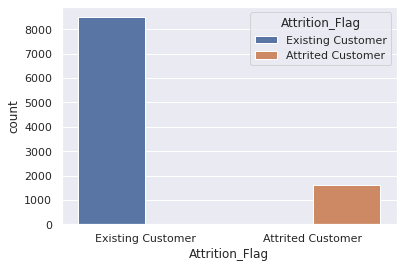

In [ ]:
sns.countplot(x='Attrition_Flag', hue='Attrition_Flag',data= df);

In [ ]:
def is_what_percent_of(num_a, num_b):
    return (num_a / num_b) * 100
print(is_what_percent_of(8500, 10000)) 

85.0


In [ ]:
print(is_what_percent_of(1627, 10000)) 

16.27


###2) Attrition Rate

In [ ]:
df['Attrition_Flag'].value_counts() / len(df) * 100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

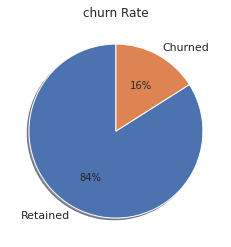

In [ ]:
x = [83.93,16.0]
labels = ['Retained', 'Churned']
plt.pie(x, labels=labels, autopct='%1.f%%', shadow= True, startangle=90)
plt.title("churn Rate")
plt.show()

### 3)Which age groups of people connect to bank?

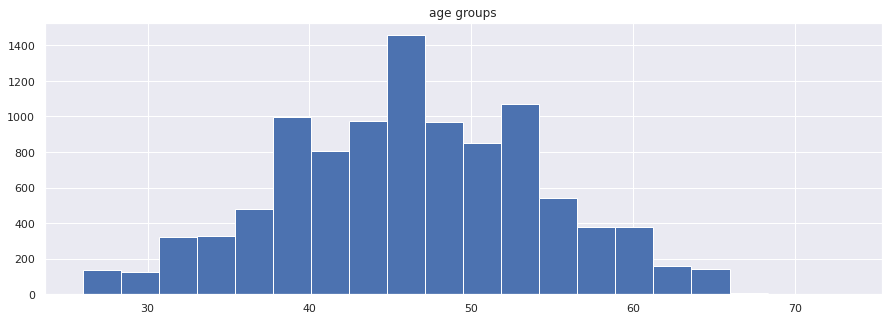

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(df['Customer_Age'], bins=20)
plt.title('age groups')
plt.show()

###4)	At which income category’s customer mostly have credit card facility.

In [ ]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

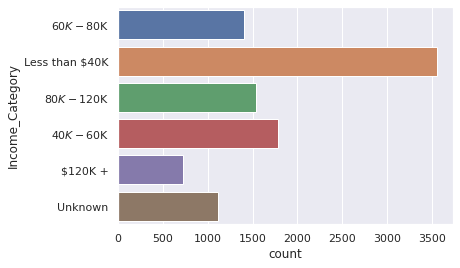

In [ ]:
sns.countplot(data= df, y='Income_Category');

###5)which card category customers mostly have?

In [ ]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

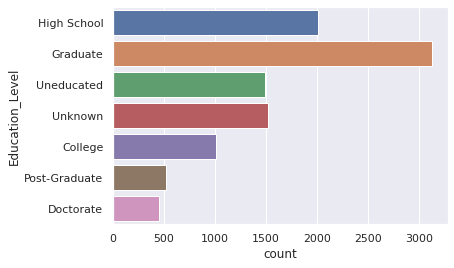

In [ ]:
sns.countplot(data= df, y='Education_Level');

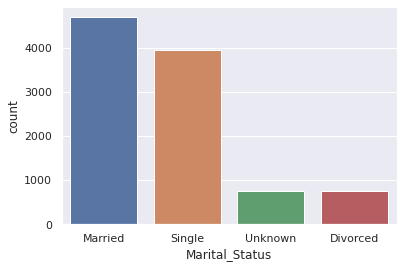

In [ ]:
sns.countplot(data= df, x='Marital_Status');

###Split data into two part i.e exsiting and churned customers.

In [ ]:
df_churned =  df[df['Attrition_Flag'] == 'Attrited Customer']
df_churned.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,1438.3,0,1438.3,692,16,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,7882.0,605,7277.0,704,16,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,3,1438.3,808,630.3,705,19,0.562
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,1,3,15769.0,0,15769.0,602,15,0.000
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,34516.0,0,34516.0,691,15,0.000


In [ ]:
df_exsiting =  df[df['Attrition_Flag'] != 'Attrited Customer']

###6)	How much attrition occur gender wise.

In [ ]:
df2 = df.groupby(['Attrition_Flag','Gender'])['CLIENTNUM'].count()
print(df2)

Attrition_Flag     Gender
Attrited Customer  F          930
                   M          697
Existing Customer  F         4428
                   M         4072
Name: CLIENTNUM, dtype: int64


In [ ]:
df_churned['Gender'].value_counts()

F    930
M    697
Name: Gender, dtype: int64

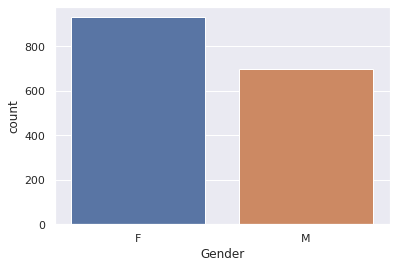

In [ ]:
sns.countplot(x= 'Gender', data= df_churned);

###Total churn on each income level?

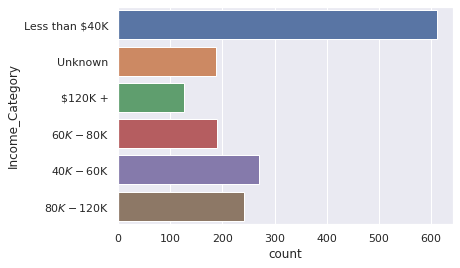

In [ ]:
sns.countplot(data = df_churned, y = 'Income_Category');

### split churned data into female because of analyzing demographics?

In [ ]:
df_female = df_churned[df_churned['Gender'] == 'F']
df_female.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,1438.3,0,1438.3,692,16,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,7882.0,605,7277.0,704,16,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,3,1438.3,808,630.3,705,19,0.562
82,711013983,Attrited Customer,55,F,4,Unknown,Married,$40K - $60K,Blue,45,2,4,2158.0,0,2158.0,615,12,0.000
140,789322833,Attrited Customer,48,F,5,High School,Married,Less than $40K,Blue,38,1,3,8025.0,0,8025.0,673,18,0.000


In [ ]:
df_female.shape

(930, 18)

###7) from which income group churend females belongs to?

In [ ]:
df_female['Income_Category'].value_counts()

Less than $40K    582
Unknown           182
$40K - $60K       166
Name: Income_Category, dtype: int64

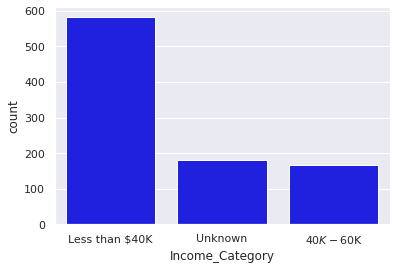

In [ ]:
sns.countplot(x='Income_Category', data=df_female,color = 'blue');

In [ ]:
df_female['Card_Category'].value_counts()


Blue        890
Silver       28
Gold          8
Platinum      4
Name: Card_Category, dtype: int64

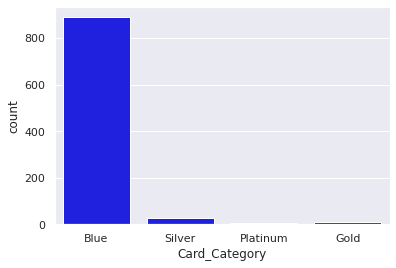

In [ ]:
sns.countplot(x='Card_Category', data=df_female,color = 'blue')

###Split churn female data according to income category i.e Less than $40k because at this Level people more leave credit card service.

In [ ]:
df_income = df_female[df_female['Income_Category'] == 'Less than $40K']
df_income.shape

(582, 18)

###Which credit card people have at this income level?

In [ ]:
df_income['Card_Category'].value_counts()

Blue        559
Silver       17
Gold          4
Platinum      2
Name: Card_Category, dtype: int64

###How many dependent counts churn female have at this level of income?

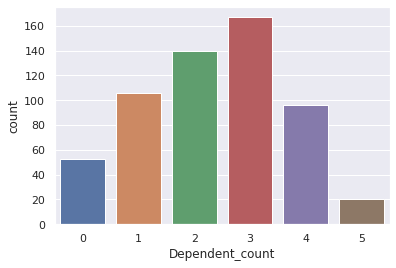

In [ ]:
df_income['Dependent_count'].value_counts()
sns.countplot(x='Dependent_count', data=df_income);

###What is the max credit card limit and total trans amount of churned female at this level  of income?

In [ ]:
df_income['Credit_Limit'].max()

15987.0

In [ ]:
df_income['Total_Trans_Amt'].max()

10294

### How many people remain inactive?

In [ ]:
df_income['Months_Inactive_12_mon'].value_counts()

3    299
2    187
4     35
1     34
5     11
6      9
0      7
Name: Months_Inactive_12_mon, dtype: int64

###What is the marital status of churn females?

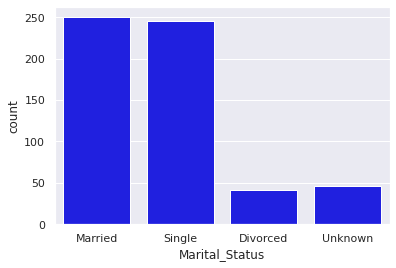

In [ ]:
df_income['Marital_Status'].value_counts()
sns.countplot(x='Marital_Status', data=df_income);

###What is the Education Level of churn females?

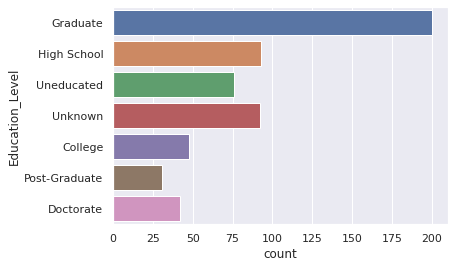

In [ ]:
df_income['Education_Level'].value_counts()
sns.countplot(y='Education_Level', data=df_income);

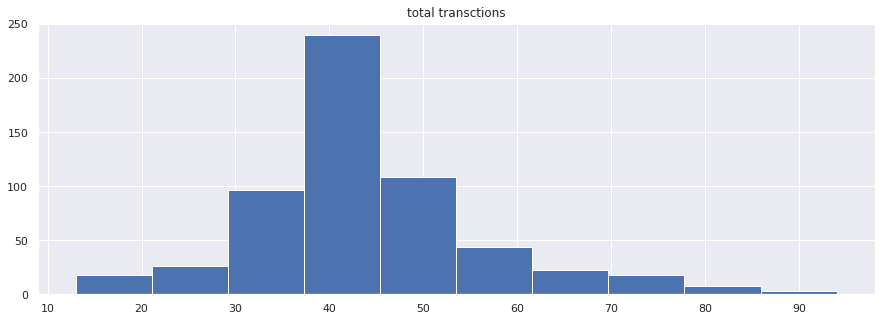

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(df_income['Total_Trans_Ct'], bins= 10)
plt.title('total transctions')
plt.show()

###Analyze blue card holders churn customers.

In [ ]:
df_b = df_female[df_female['Card_Category'] == 'Blue']
df_b.shape

(890, 18)

In [ ]:
df_b['Income_Category'].value_counts()

Less than $40K    559
Unknown           171
$40K - $60K       160
Name: Income_Category, dtype: int64

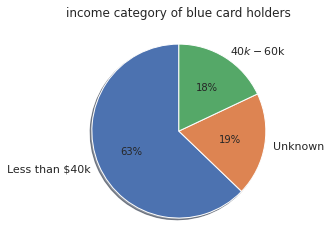

In [ ]:
x = [559,171, 160]
labels = ['Less than $40k', 'Unknown', '$40k - $60k']
plt.pie(x, labels=labels, autopct='%1.f%%', shadow= True, startangle=90)
plt.title("income category of blue card holders")
plt.show()

In [ ]:
df_b['Credit_Limit'].max()

29543.0

In [ ]:
df_b['Marital_Status'].value_counts()

Married     396
Single      361
Divorced     68
Unknown      65
Name: Marital_Status, dtype: int64

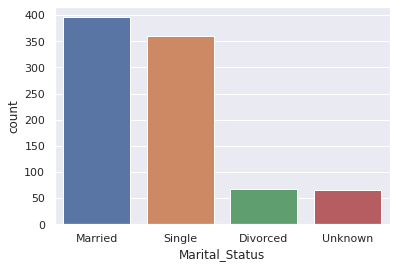

In [ ]:
sns.countplot(x='Marital_Status', data=df_b);

In [ ]:
df_b['Dependent_count'].value_counts()

3    262
2    216
1    163
4    146
0     74
5     29
Name: Dependent_count, dtype: int64

(array([ 74.,   0., 163.,   0., 216.,   0., 262.,   0., 146.,  29.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

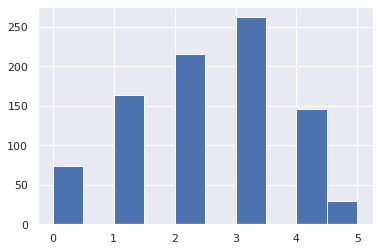

In [ ]:
plt.hist(data = df_b, x = 'Dependent_count')

###Analyze platinum card holders i.e their income ,credit limit and marital status.

In [ ]:
df_p = df_female[df_female['Card_Category'] == 'Platinum']
df_p.shape

(4, 18)

In [ ]:
df_p['Income_Category'].value_counts()

Less than $40K    2
Unknown           2
Name: Income_Category, dtype: int64

In [ ]:
df_p['Credit_Limit'].max()

34516.0

In [ ]:
df_p['Marital_Status'].value_counts()

Single     3
Married    1
Name: Marital_Status, dtype: int64

###Analyze gold card holders customers.

In [ ]:
df_gold = df_female[df_female['Card_Category'] == 'Gold']
df_gold.shape

(8, 18)

In [ ]:
df_gold['Income_Category'].value_counts()

Less than $40K    4
Unknown           2
$40K - $60K       2
Name: Income_Category, dtype: int64

In [ ]:
df_gold['Credit_Limit'].max()

34516.0

In [ ]:
df_gold['Marital_Status'].value_counts()

Single     5
Married    2
Unknown    1
Name: Marital_Status, dtype: int64

In [ ]:
df_s = df_female[df_female['Card_Category'] == 'Silver']

In [ ]:
df_s['Income_Category'].value_counts()

Less than $40K    17
Unknown            7
$40K - $60K        4
Name: Income_Category, dtype: int64

In [ ]:
df_s['Marital_Status'].value_counts()

Married    13
Single     12
Unknown     3
Name: Marital_Status, dtype: int64

In [ ]:
df_s['Credit_Limit'].max()

34516.0

###13)	How many total transactions churned people do  in last 12 months.

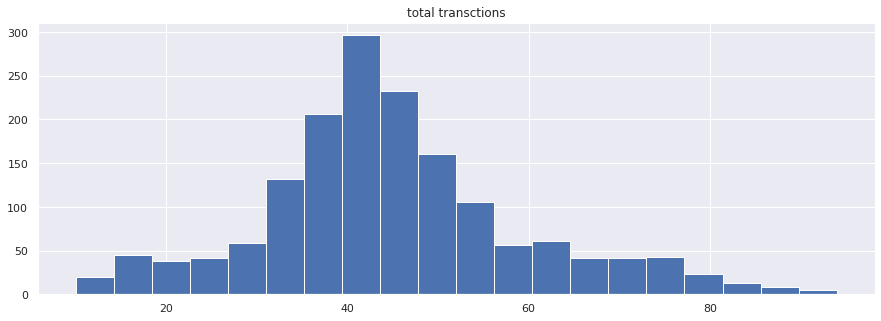

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(df_churned['Total_Trans_Ct'], bins=20)
plt.title('total transctions')
plt.show()

###16)corelation

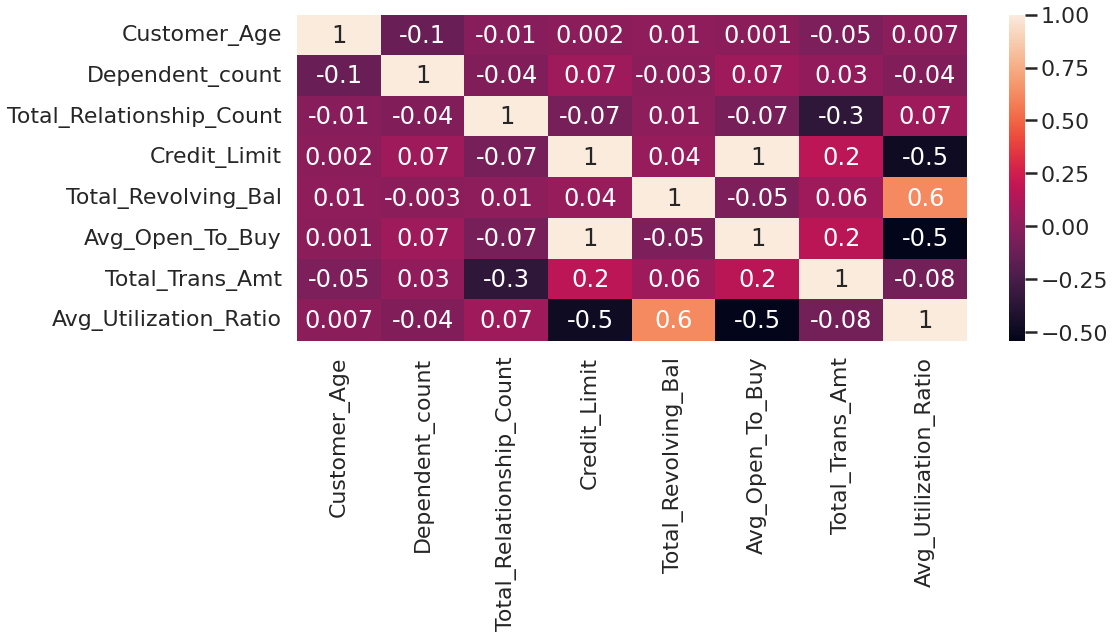

In [ ]:
sns.set_context('poster')
plt.figure(figsize=(15,6))
cor=df.drop(['CLIENTNUM','Months_on_book', 'Total_Trans_Ct', 'Months_Inactive_12_mon'], axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

###Analyzing credit limits and avg utilization ration of different income groups groups.

In [ ]:
df_income = df_churned[df_churned['Income_Category'] == 'Less than $40K']
df_income['Credit_Limit'].max()


15987.0

In [ ]:
df_income['Avg_Utilization_Ratio'].max()

0.995

In [ ]:
df_income1 = df_churned[df_churned['Income_Category'] == '$40K - $60K']
df_income1.shape

(271, 18)

In [ ]:
df_income1['Credit_Limit'].max()

23981.0

In [ ]:
df_income1['Avg_Utilization_Ratio'].max()

0.999

In [ ]:
df_income2 = df_churned[df_churned['Income_Category'] == 'Unknown']
df_income2.shape

(187, 18)

In [ ]:
df_income2['Credit_Limit'].max()

34516.0

In [ ]:
df_income2['Avg_Utilization_Ratio'].max()

0.992

In [ ]:
df_income3 = df_churned[df_churned['Income_Category'] == '$80k - $120k']
df_income3.shape

(0, 18)

In [ ]:
df_income4 = df_churned[df_churned['Income_Category'] == '$120k+']
df_income4.shape

(0, 18)